# Programming Exercise 2: Logistic Regression


In [2]:
#manipulating directory path
import os

#vector computation
import numpy as np

#import package pandas for manipulating multidimensional data in dataframe format
import pandas as pd

#optimazation module in scipy
from scipy import optimize

#load matlab format data
from scipy.io import loadmat

#load visualization library matplotlib
import matplotlib.pyplot as plt



## 1 Logistic Regression


We will build a logistic regression model to predict whether a student gets admitted into a university. Suppose that we are the administrator of a university department and we want to determine each applicant’s chance of admission based on their results on two exams. We have historical data from previous applicants that we can use as a training set for logistic regression. For each training example, we have the applicant’s scores on two exams and the admissions decision. Our task is to build a classification model that estimates an applicant’s probability of admission based the scores from those two exams.

In [180]:
#load data
#first two columns represent exam scores
#the last one for labels

data = pd.read_csv(os.path.join(os.getcwd(), 'ex2\\ex2data1.txt'), dtype=np.float64, delimiter=',', header=None)

#number of examples
m = y.shape[0]

#load data into X, y
X = data.iloc[:, :-1].values
X = np.hstack([np.ones((X.shape[0], 1)), X])
y = data.iloc[:, -1].values

Next, we are  going to visualize the data for better understanding and insights

In [195]:
#visualize data
def plotData(X, y, axes=None):
    """
    Plots the data points X and y into a new figure. Plots the data 
    points with * for the positive examples and o for the negative examples.
    
    Parameters
    ----------
    X : array_like
        An Mx2 matrix representing the dataset. 
    
    y : array_like
        Label values for the dataset. A vector of size (M, ).
    
    Instructions
    ------------
    Plot the positive and negative examples on a 2D plot, using the
    option 'k*' for the positive examples and 'ko' for the negative examples.    
    """
    # Create New Figure
    plt.rcParams['figure.figsize'] = [7, 7]
    
    #indexes of examples with y==1
    pos = y == 1
    #if axes not given, then get current one
    if axes == None:
        axes = plt.gca()
        
    axes.plot(X[pos, 1], X[pos, 2], '*k', ms=10, mec='k')
    axes.plot(X[~pos, 1], X[~pos, 2], 'oy', ms=10, mec='k')
    axes.set_xlabel('Exam 1', fontsize=12)
    axes.set_ylabel('Exam 2')
    plt.legend(['Admited', 'Not Admitted'], loc='lower left', fontsize=10)
    


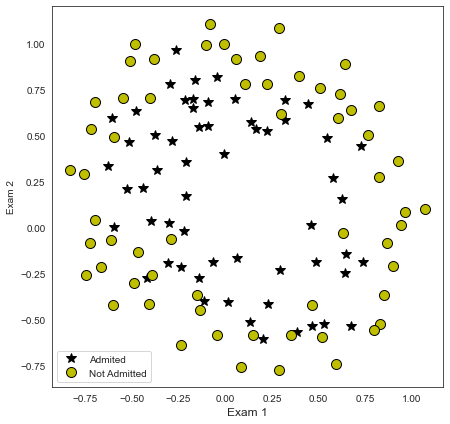

In [196]:
plotData(X, y)


Before we start with the actual cost function, recall that the logistic regression hypothesis is defined as:

$$ h_\theta(x) = g(\theta^T x)$$

where function $g$ is the sigmoid function. The sigmoid function is defined as: 

$$g(z) = \frac{1}{1+e^{-z}}$$.

Our first step is to implement this function `sigmoid` so it can be
called by the rest of wer program. When we are finished, try testing a few
values by calling `sigmoid(x)` in a new cell. For large positive values of `x`, the sigmoid should be close to 1, while for large negative values, the sigmoid should be close to 0. Evaluating `sigmoid(0)` should give we exactly 0.5. Our code should also work with vectors and matrices. **For a matrix, our function should perform the sigmoid function on every element.**
<a id="sigmoid"></a>

### Sigmoid Fucntion

In [15]:
def sigmoid(z):
    """
    Compute sigmoid function given the input z.
    
    Parameters
    ----------
    z : array_like
        The input to the sigmoid function. This can be a 1-D vector 
        or a 2-D matrix. 
    
    Returns
    -------
    g : array_like
        The computed sigmoid function. g has the same shape as z, since
        the sigmoid is computed element-wise on z.
        
    Instructions
    ------------
    """
    
    
    # convert input to a numpy array
    z = np.array(z)
    
    # You need to return the following variables correctly 
    g = np.zeros(z.shape)
    g = 1 / (1 + np.exp(-z))

    return g

In [184]:
sigmoid(10)

0.9999546021312976

### Cost Function & Gradient Descent

`Cost Function`
$$ J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left[ -y^{(i)} \log\left(h_\theta\left( x^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - h_\theta\left( x^{(i)} \right) \right) \right]$$

`Gradient of the cost with respect to theta parameters`
$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left( x^{(i)} \right) - y^{(i)} \right) x_j^{(i)} $$

In [249]:
def costFunction(theta, X, y):
    """
    Compute cost and gradient for logistic regression. 
    
    Parameters
    ----------
    theta : array_like
        The parameters for logistic regression. This a vector
        of shape (n+1, ).
    
    X : array_like
        The input dataset of shape (m x n+1) where m is the total number
        of data points and n is the number of features. We assume the 
        intercept has already been added to the input.
    
    y : arra_like
        Labels for the input. This is a vector of shape (m, ).
    
    Returns
    -------
    J : float
        The computed value for the cost function. 
    
    grad : array_like
        A vector of shape (n+1, ) which is the gradient of the cost
        function with respect to theta, at the current values of theta.
        
    Instructions
    ------------
    Compute the cost of a particular choice of theta. You should set J to 
    the cost. Compute the partial derivatives and set grad to the partial
    derivatives of the cost w.r.t. each parameter in theta.
    """
    # Initialize some useful values
    m = y.size  # number of training examples

    # You need to return the following variables correctly 
    J = 0
    grad = np.zeros(theta.shape)
    
    #hypothesis or predicted output
    h = sigmoid(X @ theta)
    
    #cost function
    J = (-1 / m) * (y @ np.log(h)  + (1 - y) @ np.log(1 - h))
    
    #grad of cost function with respect to theta
    grad = 1 / m * (X.T @ (h - y))
    
    if np.isnan(J):
        return np.inf
    
    return J, grad

In [250]:
# Initialize fitting parameters
initial_theta = np.zeros(n+1)

cost, grad = costFunction(initial_theta, X, y)

print('Cost at initial theta (zeros): {:.3f}'.format(cost))
print('Expected cost (approx): 0.693\n')

print('Gradient at initial theta (zeros):')
print('\t[{:.4f}, {:.4f}, {:.4f}]'.format(*grad))
print('Expected gradients (approx):\n\t[-0.1000, -12.0092, -11.2628]\n')

# Compute and display cost and gradient with non-zero theta
test_theta = np.array([-24, 0.2, 0.2])
cost, grad = costFunction(test_theta, X, y)

print('Cost at test theta: {:.3f}'.format(cost))
print('Expected cost (approx): 0.218\n')

print('Gradient at test theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*grad))
print('Expected gradients (approx):\n\t[0.043, 2.566, 2.647]')

Cost at initial theta (zeros): 0.693
Expected cost (approx): 0.693

Gradient at initial theta (zeros):
	[-0.1000, -12.0092, -11.2628]
Expected gradients (approx):
	[-0.1000, -12.0092, -11.2628]

Cost at test theta: 0.218
Expected cost (approx): 0.218

Gradient at test theta:
	[0.043, 2.566, 2.647]
Expected gradients (approx):
	[0.043, 2.566, 2.647]


Using scipy library to find the right parameters theta together with the supposedly minimum cost. In this part, we gonna use truncated Newton algorithm

In [272]:
#initialize fitting parameters
initial_thetas = np.zeros(X.shape[1])
#set options for optimize.minimize
options = {'maxiter': 400}
#run minimizer
minimizer = optimize.minimize(fun=costFunction, x0=initial_thetas, args=(X,y), method='TNC', jac=True, options=options)
#optimizeResult
print('''Attributes
xndarray
The solution of the optimization.

successbool
Whether or not the optimizer exited successfully.

statusint
Termination status of the optimizer. Its value depends on the underlying solver. Refer to message for details.

messagestr
Description of the cause of the termination.

fun, jac, hess: ndarray
Values of objective function, its Jacobian and its Hessian (if available). The Hessians may be approximations, see the documentation of the function in question.

hess_invobject
Inverse of the objective function’s Hessian; may be an approximation. Not available for all solvers. The type of this attribute may be either np.ndarray or scipy.sparse.linalg.LinearOperator.

nfev, njev, nhevint
Number of evaluations of the objective functions and of its Jacobian and Hessian.

nitint
Number of iterations performed by the optimizer.

maxcvfloat
The maximum constraint violation.''')
minimizer

Attributes
xndarray
The solution of the optimization.

successbool
Whether or not the optimizer exited successfully.

statusint
Termination status of the optimizer. Its value depends on the underlying solver. Refer to message for details.

messagestr
Description of the cause of the termination.

fun, jac, hess: ndarray
Values of objective function, its Jacobian and its Hessian (if available). The Hessians may be approximations, see the documentation of the function in question.

hess_invobject
Inverse of the objective function’s Hessian; may be an approximation. Not available for all solvers. The type of this attribute may be either np.ndarray or scipy.sparse.linalg.LinearOperator.

nfev, njev, nhevint
Number of evaluations of the objective functions and of its Jacobian and Hessian.

nitint
Number of iterations performed by the optimizer.

maxcvfloat
The maximum constraint violation.


     fun: 0.2034977015894746
     jac: array([8.96939697e-09, 8.36911572e-08, 4.76674440e-07])
 message: 'Local minimum reached (|pg| ~= 0)'
    nfev: 36
     nit: 17
  status: 0
 success: True
       x: array([-25.16131863,   0.20623159,   0.20147149])

Check the result from optimization using Scipy


In [278]:
print(*minimizer.x)

-25.16131862768876 0.2062315885479685 0.20147148619809094


In [289]:
print(f'Minimum cost at the result theta: {minimizer.fun:.3f}')
print('theta:', end=' ')
print('{:.3f}, {:.3f}, {:.3f}'.format(*minimizer.x))

Minimum cost at the result theta: 0.203
theta: -25.161, 0.206, 0.201


In [266]:
# set options for optimize.minimize
options= {'maxiter': 400}

# see documention for scipy's optimize.minimize  for description about
# the different parameters
# The function returns an object `OptimizeResult`
# We use truncated Newton algorithm for optimization which is 
# equivalent to MATLAB's fminunc
# See https://stackoverflow.com/questions/18801002/fminunc-alternate-in-numpy
res = optimize.minimize(costFunction,
                        initial_theta,
                        (X, y),
                        jac=True,
                        method='TNC',
                        options=options)

# the fun property of `OptimizeResult` object returns
# the value of costFunction at optimized theta
cost = res.fun

# the optimized theta is in the x property
theta = res.x

# Print theta to screen
print('Cost at theta found by optimize.minimize: {:.3f}'.format(cost))
print('Expected cost (approx): 0.203\n');

print('theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*theta))
print('Expected theta (approx):\n\t[-25.161, 0.206, 0.201]')

Cost at theta found by optimize.minimize: 0.203
Expected cost (approx): 0.203

theta:
	[-25.161, 0.206, 0.201]
Expected theta (approx):
	[-25.161, 0.206, 0.201]


OK, so now we move on to the plot of decision boundary after finding thetas

a. Decision Boundary by Contour Plot

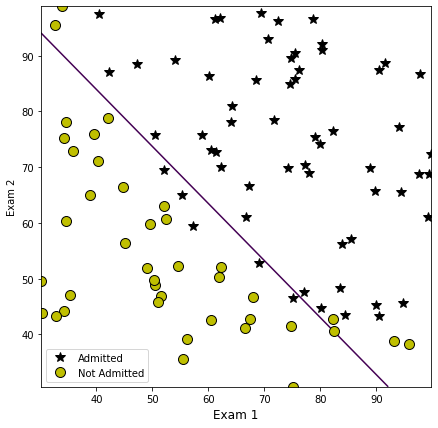

In [370]:
plotData(X, y)
theta = minimizer.x
x1 = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 100)
x2 = np.linspace(np.min(X[:, 2]), np.max(X[:, 2]), 100)
xx1, xx2 = np.meshgrid(x1, x2)
h = np.zeros((x1.size, x2.size))
for (i, j), _ in np.ndenumerate(h):
    h[i, j] = sigmoid(theta @ np.hstack([1, xx1[i, j], xx2[i, j]]))
plt.contour(x1, x2, h, [0.5])
axes = plt.gca()
axes.legend(['Admitted', 'Not Admitted', 'Decision Boundary'])

b. Decision Boundary by choosing X1, X2 for decision line 

In [398]:
plot_x

array([ 50, 100])

In [379]:
plot_y 

array([96.16598094, 20.65402819])

(30.0, 100.0)

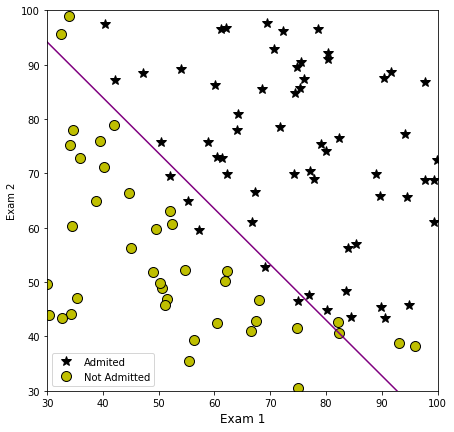

In [407]:
plotData(X, y)
theta = minimizer.x
#choose 2 points for x1 axis to plot the boundary
plot_x1 = np.array([np.min(X[:, 1]) - 2, np.max(X[:, 1]) + 2])

#now we calculate the point on x2 corresponding to chosen x1 
plot_x2 = (-1. / theta[2]) * (theta[1] * plot_x + theta[0])

#adjust plot
plt.plot(plot_x, plot_y, color='purple')
plt.xlim(30, 100)
plt.ylim(30, 100)

<a id="section4"></a>
#### 1.2.4 Evaluating logistic regression

After learning the parameters, we can use the model to predict whether a particular student will be admitted. For a student with an Exam 1 score of 45 and an Exam 2 score of 85, we should expect to see an admission probability of 0.776. 

Another way to evaluate the quality of the parameters we have found is to see how well the learned model predicts on our training set. In this part, wer task is to complete the code in function `predict`. 

The predict function will produce “1” or “0” predictions given a dataset and a learned parameter vector $\theta$. 
<a id="predict"></a>

In [59]:
def predict(theta, X):
    """
    Predict whether the label is 0 or 1 using learned logistic regression.
    Computes the predictions for X using a threshold at 0.5 
    (i.e., if sigmoid(theta.T*x) >= 0.5, predict 1)
    
    Parameters
    ----------
    theta : array_like
        Parameters for logistic regression. A vecotor of shape (n+1, ).
    
    X : array_like
        The data to use for computing predictions. The rows is the number 
        of points to compute predictions, and columns is the number of
        features.

    Returns
    -------
    p : array_like
        Predictions and 0 or 1 for each row in X. 
    
    Instructions
    ------------
    Complete the following code to make predictions using your learned 
    logistic regression parameters.You should set p to a vector of 0's and 1's    
    """

    m = X.shape[0] # Number of training examples

    # You need to return the following variables correctly
    p = np.zeros(m)

    # ====================== YOUR CODE HERE ======================
    p = np.where(sigmoid(X @ theta)>=0.5, 1, 0)
    
    
    # ============================================================
    return p

In [445]:
#predict admission prob for a student with 45 for exam 1 and 85 for exam 2
prob = sigmoid(minimizer.x @ [1, 45, 85])
print('Probability for the student to be admitted given his scores on 2 exams: '+str(round(prob, 3) * 100)+'%')

#accuracy not using predict func
acc_1 = np.mean((sigmoid(X @ minimizer.x)>=0.5).astype('int') == y)
#with func
acc_2 = predict(minimizer.x, X)
print(r'We have achieved the training acc of : %.d%% (%d%%)'%(acc_1*100, np.mean(acc_2==y)*100))

Probability for the student to be admitted given his scores on 2 exams: 77.60000000000001%
We have achieved the training acc of : 89% (89%)


Check result with models imported from sklearn library

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#split dataset into train & test set
X_train, X_test, y_train, y_test = train_test_split(X[:, 1:], y, train_size=0.95, random_state=42)

#we gonna use newton conjugate gradient
LogReg = LoR()
LogReg.fit(X_train, y_train)
#we gonna measure prediction accuracy over train + test sets
y_train_pred = LogReg.predict(X_train)
print('Training Accuracy:', accuracy_score(y_train, y_train_pred))
print('Test accuracy:', accuracy_score(y_test, LogReg.predict(X_test)))
print('~10% in difference between accuracies for train + test sets - slight overfitting')

NameError: name 'LoR' is not defined

## 2 Regularized logistic regression


In case of overfitting, we would need to fit data using regularization techniques, that is to shrink the weights of our parameters

Problem: We will implement regularized logistic regression to predict whether microchips from a fabrication plant passes quality assurance (QA). During QA, each microchip goes through various tests to ensure it is functioning correctly.

Suppose we are the product manager of the factory and we have the test results for some microchips on two different tests. From these two tests, we would like to determine whether the microchips should be accepted or rejected. To help we make the decision, we have a dataset of test results on past microchips, from which we can build a logistic regression model.

In [45]:
data = np.loadtxt('ex2data2.txt', delimiter=',')
#assign x and add intercept or bias term
X = np.c_[np.ones((data.shape[0], 1)), data[:, 0], data[:, 1]]
#assign y 
y = data[:, -1]

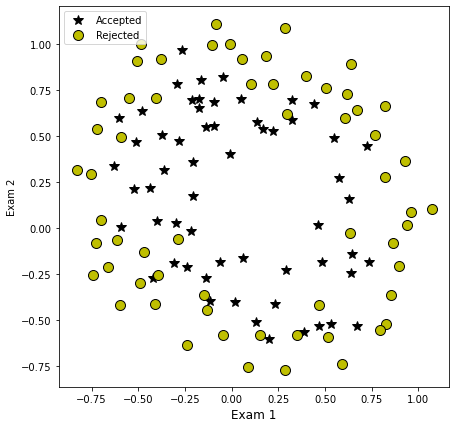

In [46]:
plotData(X, y)
plt.legend(['Accepted', 'Rejected'], loc='upper left')
plt.show()

### Featur mapping

It is still better to create more features from each data point in case we currently have low number of features. The purpose of this is to exploit more information from our dataset through making of our model more complex (or we can say less visually linear).

For this task, we gonna match our features `x1` and `x2` up to the sixth power.

$$ \text{mapFeature}(x) = \begin{bmatrix} 1 & x_1 & x_2 & x_1^2 & x_1 x_2 & x_2^2 & x_1^3 & \dots & x_1 x_2^5 & x_2^6 \end{bmatrix}^T $$

In [118]:
from sklearn.preprocessing import PolynomialFeatures

In [48]:
X.shape

(118, 3)

In [49]:
#create 6-order polynomial for 2 feature x1 and x2
polynomial = PolynomialFeatures(6)
XX = polynomial.fit_transform(X[:, 1:])
XX.shape

(118, 28)

In [52]:
#train test split
XX_train, XX_test, y_train, y_test = train_test_split(XX, y, train_size=0.9, test_size=0.1, random_state=42)

Feature mapping is expected to give us a more expressive and complex classifer that could better describe the distrubition of our data points. Howver, this method could be more prone to overfitting, making it necessary for us to employ regularization technique.

### Regularized Cost Function for Logistic Regression

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^m \left[ -y^{(i)}\log \left( h_\theta \left(x^{(i)} \right) \right) - \left( 1 - y^{(i)} \right) \log \left( 1 - h_\theta \left( x^{(i)} \right) \right) \right] + \frac{\lambda}{2m} \sum_{j=1}^n \theta_j^2 $$


### Gradients of Regularized Cost Fucntion

We are not going to regularize $\theta_0$. So we have:
$$ \frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left(x^{(i)}\right) - y^{(i)} \right) x_j^{(i)} \qquad \text{for } j =0 $$

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \left( \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left(x^{(i)}\right) - y^{(i)} \right) x_j^{(i)} \right) + \frac{\lambda}{m}\theta_j \qquad \text{for } j \ge 1 $$

In [53]:
def costFunctionReg(theta, X, y, lambda_):
    """
    Compute cost and gradient for logistic regression with regularization.
    
    Parameters
    ----------
    theta : array_like
        Logistic regression parameters. A vector with shape (n, ). n is 
        the number of features including any intercept. If we have mapped
        our initial features into polynomial features, then n is the total 
        number of polynomial features. 
    
    X : array_like
        The data set with shape (m x n). m is the number of examples, and
        n is the number of features (after feature mapping).
    
    y : array_like
        The data labels. A vector with shape (m, ).
    
    lambda_ : float
        The regularization parameter. 
    
    Returns
    -------
    J : float
        The computed value for the regularized cost function. 
    
    grad : array_like
        A vector of shape (n, ) which is the gradient of the cost
        function with respect to theta, at the current values of theta.
    
    Instructions
    ------------
    Compute the cost `J` of a particular choice of theta.
    Compute the partial derivatives and set `grad` to the partial
    derivatives of the cost w.r.t. each parameter in theta.
    """
    # Initialize some useful values
    m = y.size  # number of training examples

    # You need to return the following variables correctly 
    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X @ theta)
    J = (-1 / m) * (y @ np.log(h) + (1 - y) @ np.log(1 - h)) + lambda_ / (2 * m ) * theta[1:] @ theta[1:]
    
    grad = (1 / m) * X.T @ (h - y) + (lambda_ / m) * (np.hstack([0, theta[1:]]))
    return J, grad

In [54]:
# Initialize fitting parameters
initial_theta = np.zeros(XX.shape[1])

# Set regularization parameter lambda to 1
# DO NOT use `lambda` as a variable name in python
# because it is a python keyword
lambda_ = 1

# Compute and display initial cost and gradient for regularized logistic
# regression
cost, grad = costFunctionReg(initial_theta, XX, y, lambda_)

print('Cost at initial theta (zeros): {:.3f}'.format(cost))
print('Expected cost (approx)       : 0.693\n')

print('Gradient at initial theta (zeros) - first five values only:')
print('\t[{:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}]'.format(*grad[:5]))
print('Expected gradients (approx) - first five values only:')
print('\t[0.0085, 0.0188, 0.0001, 0.0503, 0.0115]\n')


# Compute and display cost and gradient
# with all-ones theta and lambda = 10
test_theta = np.ones(XX.shape[1])
cost, grad = costFunctionReg(test_theta, XX, y, 10)

print('------------------------------\n')
print('Cost at test theta    : {:.2f}'.format(cost))
print('Expected cost (approx): 3.16\n')

print('Gradient at test theta - first five values only:')
print('\t[{:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}]'.format(*grad[:5]))
print('Expected gradients (approx) - first five values only:')
print('\t[0.3460, 0.1614, 0.1948, 0.2269, 0.0922]')

Cost at initial theta (zeros): 0.693
Expected cost (approx)       : 0.693

Gradient at initial theta (zeros) - first five values only:
	[0.0085, 0.0188, 0.0001, 0.0503, 0.0115]
Expected gradients (approx) - first five values only:
	[0.0085, 0.0188, 0.0001, 0.0503, 0.0115]

------------------------------

Cost at test theta    : 3.16
Expected cost (approx): 3.16

Gradient at test theta - first five values only:
	[0.3460, 0.1614, 0.1948, 0.2269, 0.0922]
Expected gradients (approx) - first five values only:
	[0.3460, 0.1614, 0.1948, 0.2269, 0.0922]


Next, we are going to learn the optimal parameters for our cost function to reach its minumum. For this task, scipy - a numerical computing library is going to be used.

After that, it is coming to experiments with different values of lambda in order to see how regularization could help us reduce overfitting or in the other way, increase underfitting through the plot of the decision boundaries using different values or regularization parameters.

C:\Users\lamtr\anaconda3\envs\clone_3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: overflow encountered in exp


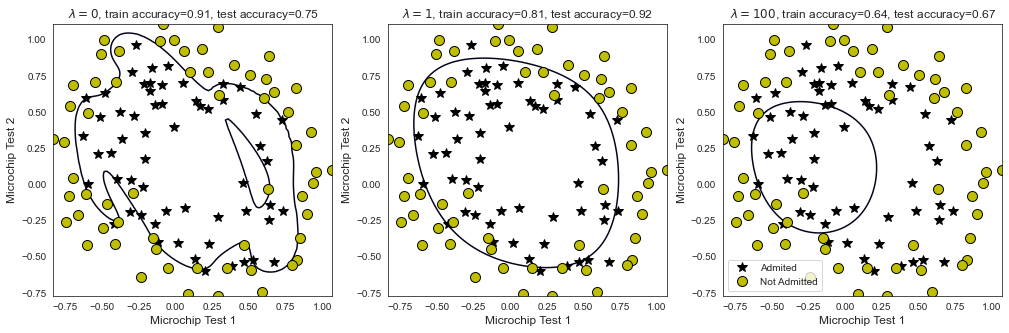

In [215]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(17, 5))

#list of lambda values
lambda_ = [0, 1, 100]
for i, j in enumerate(lambda_):
    #intialize parameters
    initial_theta = np.zeros(XX_train.shape[1])

    #user scipy.optimzie.minimize with passed arguments
    minimizer = optimize.minimize(fun=costFunctionReg,
                                  x0=initial_theta,
                                  args=(XX_train, y_train, j),
                                  method='TNC',
                                  jac=True,
                                  options={'maxiter': 2300})

    #learned or trained parameters
    theta = minimizer.x
    #train & test accuracy rate
    train_accuracy = np.mean(predict(theta, XX_train) == y_train)
    test_accuracy = np.mean(predict(theta, XX_test) == y_test)

    #generate coordinate grid between X1 and X2
    X1 = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 100)
    X2 = np.linspace(np.min(X[:, 2]), np.max(X[:, 2]), 100)
    XX1, XX2 = np.meshgrid(X1, X2)

    #add polynomials terms to our features
    polynomials = polynomial.fit_transform(np.c_[XX1.flatten(), XX2.flatten()])

    #hypothesis outputs
    h = sigmoid(polynomials @ theta)

    #plot
    plotData(X, y, axes.flatten()[i])
    axes.flatten()[i].contour(X1, X2, h.reshape(XX1.shape), levels=[0.5])
    axes.flatten()[i].set_xlabel('Microchip Test 1')
    axes.flatten()[i].set_ylabel('Microchip Test 2', fontsize=12)
    axes.flatten()[i].set_title(
        '$\lambda = {}$, train accuracy={:.2f}, test accuracy={:.2f}'.format(
            j, train_accuracy, test_accuracy))
    